# **Übung 6: Wirbelleiterverfahren **

Flügeltiefe (c): 0.50 m
Flügelfläche (S): 5.00 m^2
Induzierte Geschwindigkeit: [5.20944533 5.20944533 5.20944533 5.20944533 5.20944533 5.20944533
 5.20944533 5.20944533 5.20944533 5.20944533]
Auftrieb (L): 0.00 N


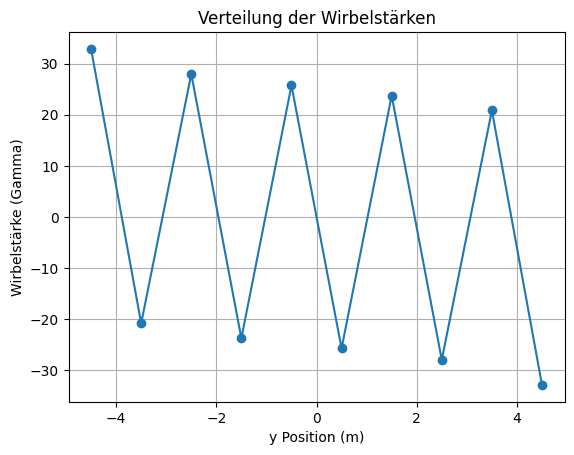

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# Eingabedaten
phi = np.radians(15)  # Pfeilungswinkel (in radians)
b = 10  # Flügelbreite (in meters)
aspect_ratio = 20  # Streckung
V = 30  # Anströmgeschwindigkeit (in m/s)
alpha = np.radians(10)  # Anstellwinkel (in radians)
rho = 1  # Luftdichte (in kg/m^3)

# Berechnung der Flügeltiefe (c) und Flügelfläche (S)
c = b / aspect_ratio
S = b * c

# Diskretisierung des Flügels
n_panels = 10  # Anzahl horizontaler Panels
dy = b / n_panels

# Berechnung der Positionen der Kontrollpunkte und Wirbel
y_control = np.linspace(-b/2 + dy/2, b/2 - dy/2, n_panels)
y_vortex = np.linspace(-b/2, b/2, n_panels + 1)

# Initialisierung der Einflussmatrix und RHS-Vektor
A = np.zeros((n_panels, n_panels))
RHS = np.zeros(n_panels)

# Einflusskoeffizienten berechnen
for i in range(n_panels):
    for j in range(n_panels):
        if i != j:
            A[i, j] = 1 / (2 * np.pi) * np.log((y_control[i] - y_vortex[j])**2 / (y_control[i] - y_vortex[j+1])**2)

# RHS-Vektor (freie Strömungskomponente)
RHS[:] = V * np.sin(alpha)

# Lösung des Gleichungssystems
gamma = np.linalg.solve(A, RHS)

# Berechnung der induzierten Geschwindigkeit und Auftrieb
induced_velocity = np.dot(A, gamma)
L = rho * V * np.sum(gamma * dy)

# Ergebnisse ausgeben
print(f"Flügeltiefe (c): {c:.2f} m")
print(f"Flügelfläche (S): {S:.2f} m^2")
print(f"Induzierte Geschwindigkeit: {induced_velocity}")
print(f"Auftrieb (L): {L:.2f} N")

# Plotten der Wirbelstärken
plt.plot(y_vortex[:-1] + dy/2, gamma, 'o-')
plt.xlabel('y Position (m)')
plt.ylabel('Wirbelstärke (Gamma)')
plt.title('Verteilung der Wirbelstärken')
plt.grid()
plt.show()


IndexError: index 16 is out of bounds for axis 0 with size 16

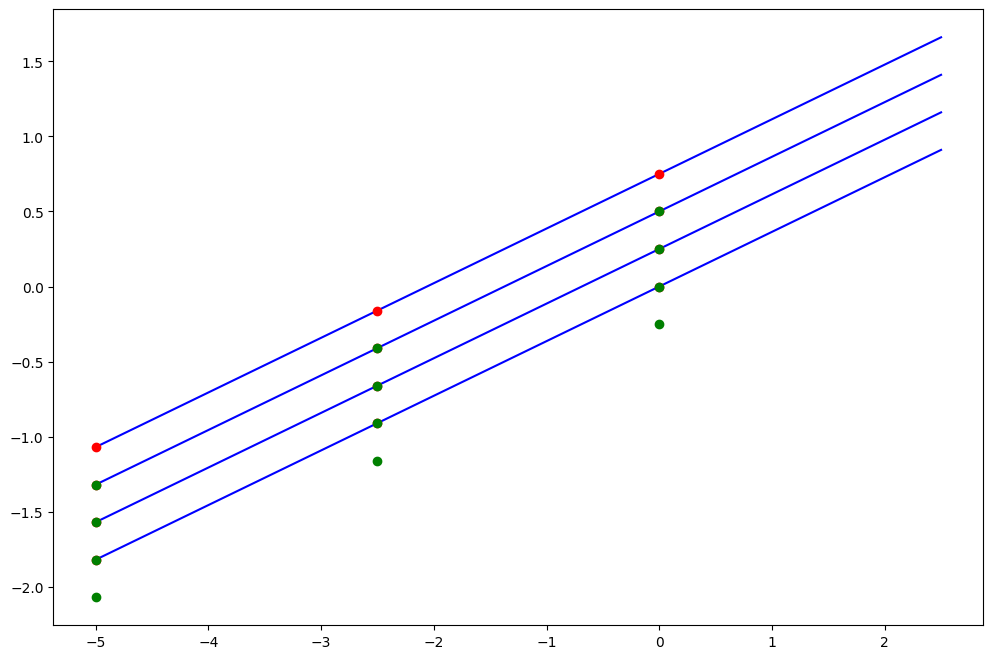

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# Parameter
n_spanwise_panels = 4  # Anzahl der Panels in Spannweite (y-Richtung)
n_chordwise_panels = 4  # Anzahl der Panels in Flügeltiefe (x-Richtung)
span = 10.0  # Spannweite des Flügels
chord_length = 1.0  # Flügeltiefe
sweep_angle = np.radians(20)  # Pfeilwinkel in Grad

# Erzeugen von Kontrollpunkten und Wirbellinien
y_positions = np.linspace(-span/2, span/2, n_spanwise_panels + 1)  # Positionen entlang der Spannweite
x_chords = np.linspace(0, chord_length, n_chordwise_panels + 1)  # Positionen entlang der Flügeltiefe

# Erstellen von Arrays für Kontrollpunkte und Wirbellinien
control_points = []
vortices = []

# Berechnung der Positionen
for i in range(n_spanwise_panels):
    for j in range(n_chordwise_panels):
        y = y_positions[i]
        x = x_chords[j]
        
        # X-Position für Kontrollpunkt und Wirbellinie
        x_control = x + y * np.tan(sweep_angle)
        x_vortex = x_control - 0.25 * chord_length
        
        # Hinzufügen der Kontrollpunkte und Wirbellinien
        control_points.append([x_control, y])
        vortices.append([x_vortex, y])

control_points = np.array(control_points)
vortices = np.array(vortices)

# Plot erstellen
plt.figure(figsize=(12, 8))

# Vertauschen der x- und y-Koordinaten für die Plot-Darstellung
for i in range(n_spanwise_panels + 1):
    for j in range(n_chordwise_panels + 1):
        index = i * (n_chordwise_panels + 1) + j
        if j < n_chordwise_panels:
            next_index = index
            plt.plot([control_points[index, 1], control_points[next_index, 1]], 
                     [control_points[index, 0], control_points[next_index, 0]], 'b-')  # Panel horizontal
        if i < n_spanwise_panels:
            next_index = index + (n_chordwise_panels)
            plt.plot([control_points[index, 1], control_points[next_index, 1]], 
                     [control_points[index, 0], control_points[next_index, 0]], 'b-')  # Panel vertikal

        plt.plot(control_points[index, 1], control_points[index, 0], 'ro')  # Kontrollpunkte
        plt.plot(vortices[index, 1], vortices[index, 0], 'go')  # Wirbellinien

# Anpassen der Achsen und Labels
plt.xlabel('y-Koordinate (m)')
plt.ylabel('x-Koordinate (m)')
plt.title('Diskretisierte Flügelplanform mit Panels und Kontrollpunkten (Drehung um 90 Grad)')
plt.gca().invert_yaxis()  # Invertieren der y-Achse für die Anströmung von oben
plt.grid(True)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()
